0.10702230021624919
0.059527542262634035
0.03891253190843837
0.02704609424560075
0.019522017056190902
0.014491463451336317
0.01098597762625958
0.00846609218406854
训练结束，共训练8轮，损失为0.008466


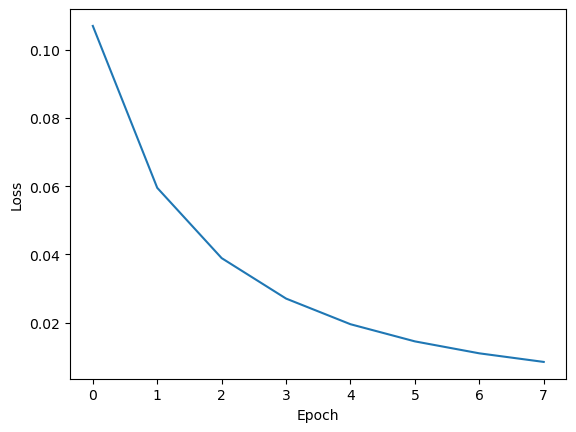

输入：[1 0]，输出：0.964817
输入：[1 0]，输出：0.964817
输入：[1 0]，输出：0.964817
输入：[0 0]，输出：-0.150894
输入：[0 0]，输出：-0.150894
输入：[0 1]，输出：0.865916
输入：[0 0]，输出：-0.150894
输入：[1 1]，输出：0.155944
输入：[1 1]，输出：0.155944
输入：[1 1]，输出：0.155944
输入：[0 1]，输出：0.865916
输入：[1 0]，输出：0.964817
输入：[1 1]，输出：0.155944
输入：[0 0]，输出：-0.150894
输入：[0 0]，输出：-0.150894
输入：[1 0]，输出：0.964817
输入：[0 0]，输出：-0.150894
输入：[1 0]，输出：0.964817
输入：[0 1]，输出：0.865916
输入：[1 0]，输出：0.964817


C:\Users\25313\AppData\Local\Temp\ipykernel_21444\727261856.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("输入：%s，输出：%f" % (X_train[i],y_pred))


In [244]:
import numpy as np
import matplotlib.pyplot as plt

# 加载数据(异或逻辑)
X = np.random.randint(0,2,(100,2))
y = np.logical_xor(X[:,0],X[:,1]).astype(int)


class RBF_NN:
    def __init__(self,input_size,hidden_size,output_size,lr = 0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = lr

        # 隐含层到输出层的权重
        self.w = np.random.rand(hidden_size,output_size)
        # 高斯径向中的参数β
        self.beta = np.random.randn(1,hidden_size)
        # 高斯径向中的参数c
        self.c = np.random.rand(self.hidden_size,self.input_size)

    def RBF(self,X):
        """高斯径向基函数"""
        return np.exp(-self.beta*np.linalg.norm(X-self.c,axis=1)**2)
    
    def predict(self,X):
        """前向传播预测"""
        # 隐含层输出
        trainX = np.tile(X,(self.hidden_size,1)) # (hidden_size,input_size)
        b = self.RBF(trainX) # (1,hidden_size)
        # 输出层输出
        y_pred = b @ self.w # (1,output_size)
        return y_pred
    
    def train(self,X,y):
        """训练模型"""
        # 从样本中随机采样隐含层中心
        # c = X[np.random.choice(X.shape[0],self.hidden_size,replace=True)] # (hidden_size,input_size)
        # 训练
        loss = 1
        loss_all = []
        epoch = 0
        while loss > 0.01 and epoch < 1000:
            for i in range(X.shape[0]):
                # 前向传播
                trainX = np.tile(X[i],(self.hidden_size,1)) # (hidden_size,input_size)
                b = self.RBF(trainX) # (1,hidden_size)
                y_pred = b @ self.w # (1,output_size)
                # 反向传播
                dw = b.T @ (y_pred - y[i]) # (hidden_size,output_size)
                dbata = -(np.linalg.norm(trainX-self.c,axis=1)**2) * (b @ dw) # (1,hidden_size)
                # 更新参数
                self.w -= self.lr * dw
                self.beta -= self.lr * dbata
            # 计算损失
            loss = self.calculate_loss(X,y)
            print(loss)
            loss_all.append(loss)
            epoch += 1
        # 打印训练信息
        print("训练结束，共训练%d轮，损失为%f" % (epoch,loss))
        plt.plot(loss_all)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.show()

    def calculate_loss(self,X,y):
        """计算损失"""
        loss = 0
        for i in range(X.shape[0]):
            y_pred = self.predict(X[i])
            loss += (1 / 2) * np.sum((y_pred - y[i]) ** 2)
        return (loss / float(X.shape[0]))

       

if __name__ == '__main__':
    # 实例化模型
    rbf = RBF_NN(input_size=2,hidden_size=10,output_size=1,lr = 0.1)
    # 训练模型
    rbf.train(X,y)
    # 预测
    X_train = np.random.randint(0,2,(20,2))
    for i in range(X_train.shape[0]):
        y_pred = rbf.predict(X_train[i])
        print("输入：%s，输出：%f" % (X_train[i],y_pred))


            
            
